In [1]:
# Jupyter Notebook

The Covid-19 Virus Pandemic has become a point of high controversy in the US. Opinions have been muddled by different practices of classification and over saturatation of the data. [Some resources claim the entire response to Covid-19 is a political hoax](https://www.washingtontimes.com/news/2020/apr/28/coronavirus-hype-biggest-political-hoax-in-history/). [Fox News suggests that the deaths reported in the US are inflated](https://www.foxnews.com/politics/birx-says-government-is-classifying-all-deaths-of-patients-with-coronavirus-as-covid-19-deaths-regardless-of-cause). Here we will perform yet another analysis on the [Covid-19 data provided graciously by the New York Times.](https://github.com/nytimes/covid-19-data) Then we will reference the [2019 US Census data](https://www.census.gov/search-results.html?q=population+data+by+state+2020&page=1&stateGeo=none&searchtype=web&cssp=SERP&_charset_=UTF-8) for perspective.

For the purpose of this analysis, we must be aware that we can only trust these findings as much as we can trust our data.

In [2]:
# __import packages__
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# __Create Variables and Import Data__
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv'
ny_data = pd.read_csv(url)
ny_data.drop('fips', axis=1, inplace=True)
ny_data.fillna(0, inplace=True) # Filling NaN's with 0's so that we are not making up any infections or deaths.
ny_data.rename(columns={'cases':'infections'}, inplace=True)

cd_data = 'data/'
census_data = pd.read_csv(cd_data+'Population Estimates by State.csv', header=1)
census_data.dropna(inplace=True) # Dropping source row
census_data.columns = ['state', 'population']
census_data['population'] = pd.to_numeric(census_data['population'].str.replace(',', ''))
data = pd.merge(ny_data, census_data, on='state')

# Data Sources
[NY Times Data](https://github.com/nytimes/covid-19-data)
[2019 Census Data](https://www.census.gov/search-results.html?q=population+data+by+state+2020&page=1&stateGeo=none&searchtype=web&cssp=SERP&_charset_=UTF-8)
*Let it be known that these calculations are done using a sum of both confirmed and probable values in both.*

Here we will define two functions. One to plot what the data says about each state and the other to create a table listing the amount of people that have been infected vs the population and the amount of people that have died vs the amount of people infected for each state.

In [3]:
def barh_plot(x_axis, color='black',line_data=[0], line_color='black', title=''):
    """
    Plot horizontal bar plot with a line.
    This is to plot several bar plots and the line shows where the next
    plot will end.
    """
    
    plt.figure(figsize=(15,15))
    data.sort_values('population', axis=0, ascending=False, inplace=True)
    plt.barh(y=data['state'], width=data[x_axis], color=color)
    plt.xticks(range(0,int(max(data[x_axis])),int(max(data[x_axis]/25))), rotation=90)
    plt.axvline(max(line_data), color=line_color)
    plt.ylabel('State')
    plt.xlabel(x_axis.replace('_',' ').title())
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.savefig('figures/'+'state_'+x_axis+'.png')

def ratio(state, column_x, column_y):
    """
    Calculates that ratio of column_x and column_y filtered by state.

        ratio = column_x / column_y
    """
    state_data = data[data['state'] == state]
    ratio = state_data[column_x]/state_data[column_y]
    return ratio.unique()[0]

ratio_data = {'state':data['state'].unique(), 'case_ratio':[], 'death_ratio':[]}
for state in data['state'].unique():
    ratio_data['case_ratio'].append(ratio(state, 'infections', 'population'))

for state in data['state'].unique():
    ratio_data['death_ratio'].append(ratio(state, 'deaths', 'infections'))


pd.DataFrame(ratio_data).to_csv(cd_data+'us_ratio_data.csv', index=False)


# Data Visualization
These plots show states by rank, the top being the largest count of values, measuring population, infections, and deaths in that order.
The colored vertical line illustrates where the next plot begins.

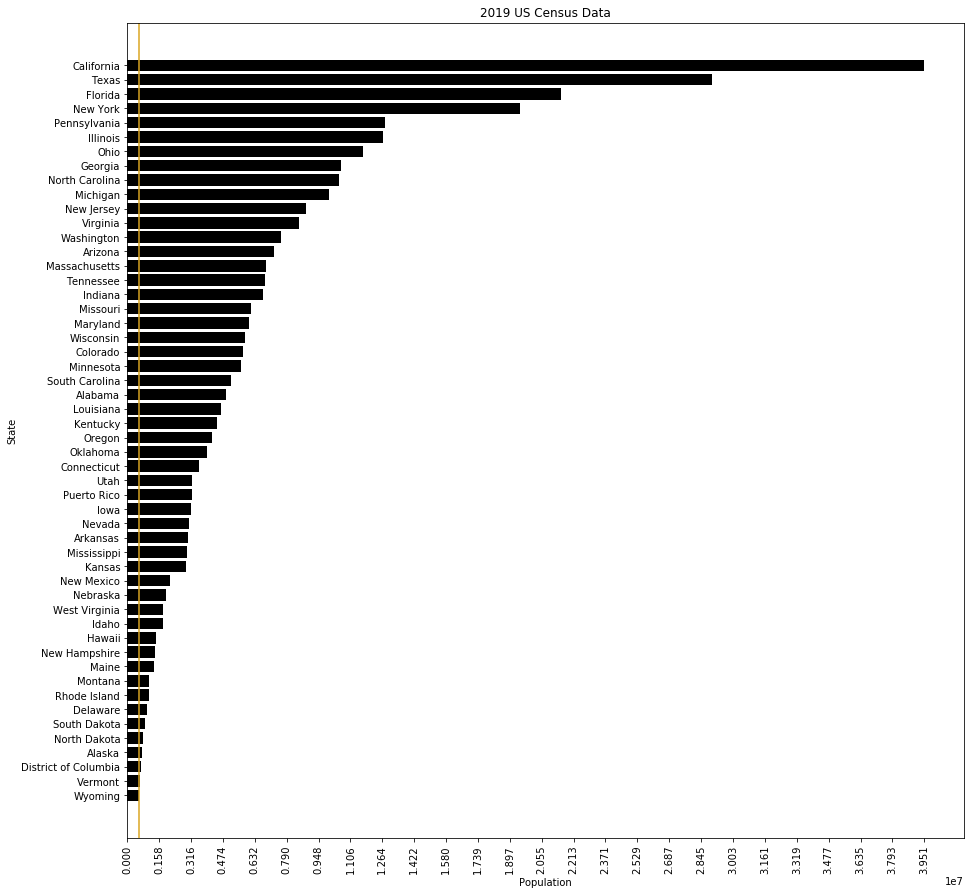

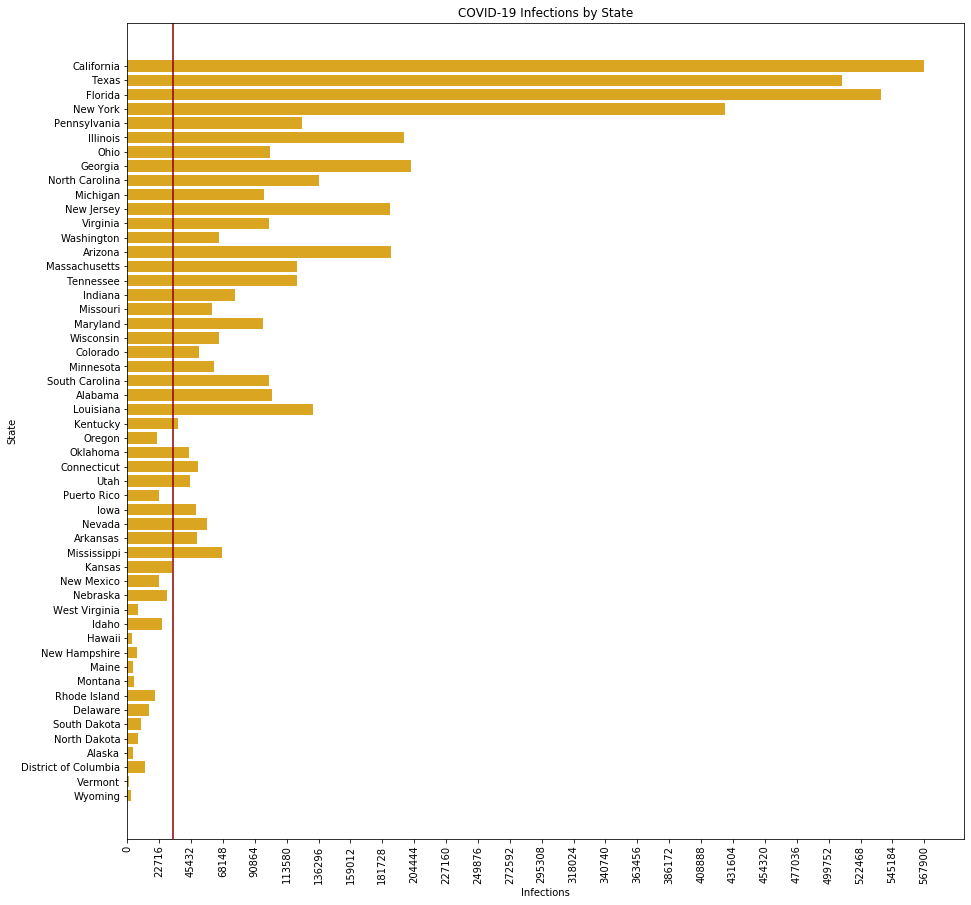

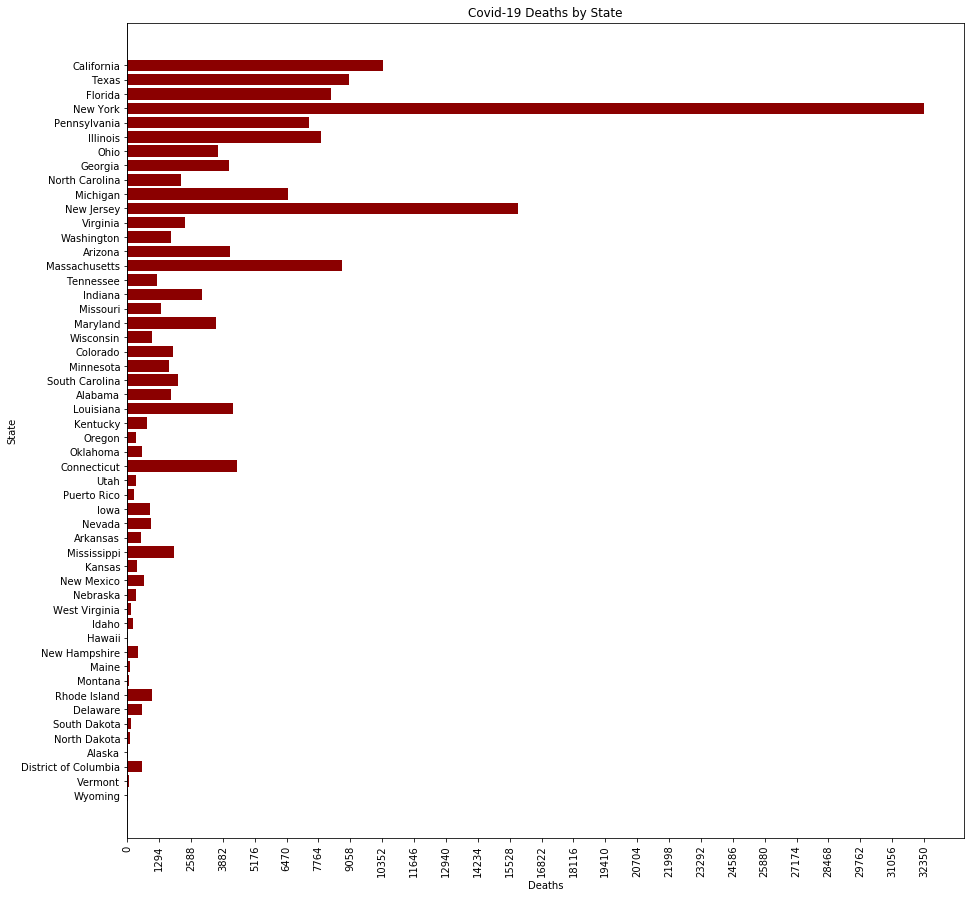

In [4]:
barh_plot('population', line_data=data['infections'], line_color='goldenrod',title='2019 US Census Data')
barh_plot('infections', color='goldenrod', line_data=data['deaths'], line_color='darkred', title='COVID-19 Infections by State')
barh_plot('deaths', color='darkred', title='Covid-19 Deaths by State')

# Observations
We can see by the vertical line in the population plot that the amount of population infected is a small fraction of the entire US population. Another point that must be made is we are not measuring time. The number of people that have been recorded as infected are not the same as the number of people that are currently infectious. Although these are tens of thousands of people, this data shows that either [CDC preventative measures](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/county-map.html) are working or the Covid-19 virus is not as infectious as we have been made to believe, perhaps a mix of both.

The infections plot carries a similar distribution to its parent populations plot. At a glance, we could say that the data that shows a higher population contributes to a higher number of people infected, until we get to Washington state. Washington appears to have less COVID-19 activity when compared to other states with similar populations. If we check the [states with the most aggressive counter measures to COVID-19](https://www.usnews.com/news/best-states/articles/2020-03-17/10-states-with-the-most-aggressive-response-to-coronavirus), Washington state ranks in 5th place. Some aggressive measures from [Washington state include a 4 step data-driven plan with excellent feature definitions](https://www.governor.wa.gov/sites/default/files/SafeStartPhasedReopening.pdf). Unfortunately, our New York Times data set does not show evidence that these aggressive measures have helped reduce the amount of COVID-19 activity based on the other 9 states from the US [News article](https://www.usnews.com/news/best-states/articles/2020-03-17/10-states-with-the-most-aggressive-response-to-coronavirus).

When viewing the deaths chart, we should expect the amount of deaths reported to be strongly correlated with the amount of infections, however this is clearly not the case. Alaska reports deaths per infections as 0.5% and Connecticut has a reported death rate of 8.83%. There are arguments for both sides, either something is causing COVID-19 deaths to have a wide range of survival rates from state to state, or the reporting is incorrect. The data says that the average death rate in the US is nearly 3%, this is especially troubling when compared to [Germany's metric of 0.4%](https://www.cnn.com/2020/03/24/opinions/germany-low-death-rate-for-coronavirus-sepkowitz/index.html). The argument in this article is that Germany has tested more of the population and found more infections that are asymptomatic resulting in a higher infection rate and lower death rate. This article from Fox News poses a theory that people who die with COVID-19 are being reported as a victim of COVID-19 and will be included in the deaths calculated in the New York Times data set.

# Infections and Deaths by State.
infection_ratio = infections / population
death_ratio = deaths / infections

In [5]:
ratio_data = {'state':data['state'].unique(), 'infection_ratio':[], 'death_ratio':[]}
for state in data['state'].unique():
    ratio_data['infection_ratio'].append(ratio(state, 'infections', 'population'))

for state in data['state'].unique():
    ratio_data['death_ratio'].append(ratio(state, 'deaths', 'infections'))

ratio_df = pd.DataFrame(ratio_data)
ratio_df.to_csv(cd_data+'us_ratio_data.csv', index=False)
print(ratio_df)
print(ratio_df.describe())

                   state  infection_ratio  death_ratio
0             California         0.014373     0.018274
1                  Texas         0.017564     0.017672
2                Florida         0.025000     0.015413
3               New York         0.021901     0.075957
4           Pennsylvania         0.009707     0.059371
5               Illinois         0.015559     0.039829
6                   Ohio         0.008703     0.036105
7                Georgia         0.019051     0.020457
8         North Carolina         0.013058     0.016034
9               Michigan         0.009757     0.066985
10            New Jersey         0.021040     0.084962
11              Virginia         0.011804     0.023097
12            Washington         0.008580     0.027152
13               Arizona         0.025775     0.022153
14         Massachusetts         0.017561     0.072166
15             Tennessee         0.017713     0.010110
16               Indiana         0.011398     0.039670
17        

# Conclusion
This data brings out more questions then it does answers. The death rate range between states is perplexing. We must also keep in mind that the data includes the probable and confirmed numbers. So if we are to empircely trust this data set, we still have to consider the error range that could come from the probable numbers. 